In [2]:
#import the necessary libraries
import yfinance as yahoofinance
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
#Download the market(S&P500) and the other stocks
stock = ['^GSPC','MU','AMD','NVDA','ROKU']
data = yahoofinance.download(stock)
ticker = yahoofinance.Tickers(stock)
data = ticker.history(period='5y', interval='1mo')

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [4]:
data.Close

,AMD,MU,NVDA,ROKU,^GSPC
Date,,,,,
2017-11-01,10.890000,42.056782,49.649464,43.900002,2647.580078
2017-11-22,NaN,NaN,NaN,NaN,NaN
2017-12-01,10.280000,40.796764,47.899178,51.779999,2673.610107
2018-01-01,13.740000,43.376324,60.845577,40.619999,2823.810059
2018-02-01,12.110000,48.426319,59.904903,40.770000,2713.830078
...,...,...,...,...,...
2022-09-01,63.360001,49.994514,121.353935,56.400002,3585.620117
2022-09-07,NaN,NaN,NaN,NaN,NaN
2022-10-01,57.849998,52.638935,115.000000,53.060001,3577.030029


In [5]:
close = data.Close

In [6]:
#Calculate the log returns of the stocks and the market
log_returns = np.log(close/close.shift())

In [7]:
log_returns.dropna(inplace=True)

In [8]:
#Calculate the Covariance of the stocks and the market
covariance = log_returns.cov()

In [9]:
#Calculate the variance of the market
variance = log_returns['^GSPC'].var()

In [10]:
variance

0.0026094252958790633

In [11]:
#Formula for calculating Beta
beta = covariance.loc['^GSPC'] / variance
beta

AMD      2.214657
MU       1.314235
NVDA     1.517308
ROKU     1.492304
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [23]:
#Assing x and y Values to create a linear regression model
x = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1,1)
y = log_returns['AMD'].iloc[1:].to_numpy().reshape(-1,1)

In [24]:
#Slope is the Beta in the linear Regression and can varie from the value we got using the formula
linear_regression = LinearRegression()
linear_regression.fit(x,y)

linear_regression.coef_[0,0]

2.133086190329136

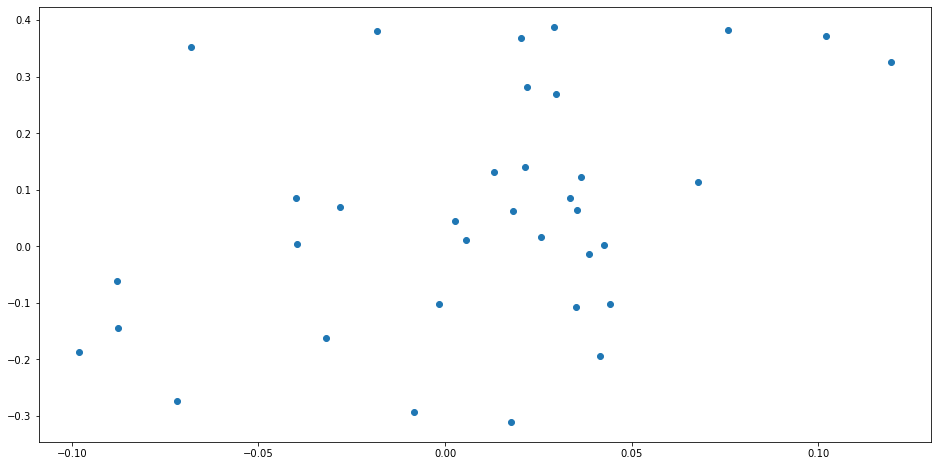

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)

In [15]:
#Calculating the expected market return of a stock based on their Beta
risk_free_rate = (3.769-8.3)/100

In [16]:
risk_free_rate

-0.04531

In [17]:
#Calculate the market risk premium
market_risk_premium = 0.10 - risk_free_rate

In [18]:
#Use the values that were calculated to calculate the expected market return using the Capital Asset Price Model(CAPM)
capital_asset_price_model = risk_free_rate + (beta['ROKU']*market_risk_premium)

In [19]:
capital_asset_price_model

0.17153671314859587

In [20]:
#Y-intercept in the linear regressing is the Alpha
#Alpha shows the performance of the stock against the market in this scenario, 
#A positive Alpha can be assume to be outperforming the market while a
#negative alpha assume the stock is underperforming the market 
linear_regression.intercept_

array([0.04651077])

In [21]:
#Just to clean up the value and store it in a table
table = pd.Series(linear_regression.intercept_)
spread = pd.DataFrame(table)

In [22]:
spread

,0
0,0.046511
